In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving people.jpg to people.jpg
User uploaded file "people.jpg" with length 167702 bytes


In [18]:
# upload haarcascading pretrained model
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml
User uploaded file "haarcascade_frontalface_default.xml" with length 930127 bytes


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow==2.0.0-beta1
import tensorflow as tf
import matplotlib.pyplot as plt

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 3.1MB 46.3MB/s 
     |████████████████████████████████| 501kB 49.3MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

In [0]:
def load_img(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.rgb_to_grayscale(image)
    return image

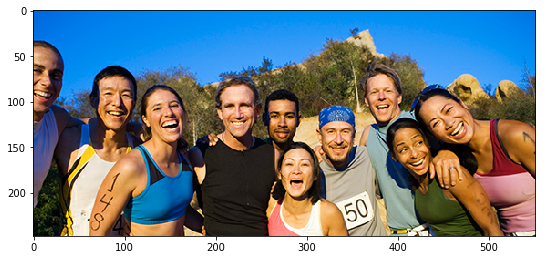

In [8]:
import cv2

image = load_img('/content/people.jpg')

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

In [0]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [0]:
pad = [image.shape[0]//2,image.shape[1]//2]

In [0]:
def detect_faces(image):
    
    img_arr = image.numpy()
    faces = face_cascade.detectMultiScale(img_arr, 1.2, 2)
    
    new_fac = []
    
    for (x,y,w,h) in faces:
        x1, y1 = int(x-3*w/5) + pad[1], int(y-3*h/5) + pad[0]
        x2, y2 = int(x+3*w/2) + pad[1], int(y+3*h/2) + pad[0]
        new_fac.append([[y1,x1], [y2,x2]])
    
    return new_fac

In [0]:
faces = detect_faces(image)

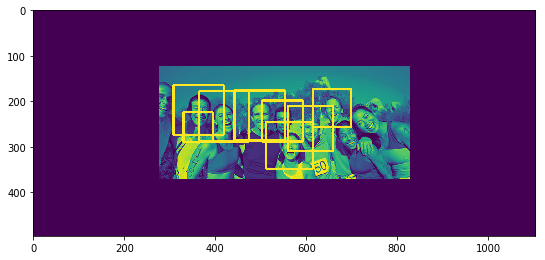

In [27]:
def show_detected_faces(image, faces):
        
    img = tf.image.rgb_to_grayscale(image)
    img = tf.squeeze(img)
    padded_img = tf.pad(img, [[pad[0],pad[0]],[pad[1],pad[1]]], "CONSTANT")
    padded_img = padded_img.numpy()
    
    for [[y1,x1],[y2,x2]] in faces:
        cv2.rectangle(padded_img,(x1,y1),(x2,y2),(255,0,0),3) 

    fig = plt.figure(figsize=(9,9))

    plt.imshow(padded_img)
    
show_detected_faces(image, faces)

## Loading in a trained model

In [35]:
!wget 'https://drive.google.com/a/tamu.edu/uc?authuser=3&id=1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH&export=download'

--2019-09-06 01:17:18--  https://drive.google.com/a/tamu.edu/uc?authuser=3&id=1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH&export=download
Resolving drive.google.com (drive.google.com)... 172.217.27.78, 2404:6800:4004:818::200e
Connecting to drive.google.com (drive.google.com)|172.217.27.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/a/tamu.edu/uc?id=1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH&export=download [following]
--2019-09-06 01:17:18--  https://drive.google.com/a/tamu.edu/uc?id=1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c8dqg5u22m4tk9ue3u50be1lba1htsa7/1567728000000/07722376435259169679/*/1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH?e=download [following]
--2019-09-06 01:17:20--  https://doc-0s-5o-docs.googleuserconte

In [0]:
from tensorflow import keras
model1 = keras.models.load_model('/content/uc?authuser=3&id=1_4opa2ndra4WgFFMkYPwxIbvkI-t5QeH&export=download')

In [38]:
model1.summary()

Model: "m1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d_1[0][0]                   
_________________________________________________________________________________________________

In [39]:
image.shape

TensorShape([248, 552, 3])

In [0]:
input_size = 128

In [41]:
faces

[[[173, 614], [257, 698]],
 [[164, 308], [274, 418]],
 [[176, 442], [286, 552]],
 [[178, 364], [288, 474]],
 [[198, 502], [288, 592]],
 [[224, 330], [289, 395]],
 [[210, 559], [309, 658]],
 [[245, 511], [348, 614]]]

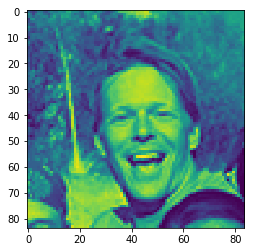

In [42]:
img = tf.image.rgb_to_grayscale(image)
img = tf.squeeze(img)
padded_img = tf.pad(img, [[pad[0],pad[0]],[pad[1],pad[1]]], "CONSTANT")
padded_img = padded_img.numpy()
for [[y1,x1],[y2,x2]] in faces:
    fac_img = padded_img[y1:y2, x1:x2]

    plt.imshow(fac_img)
    break

In [0]:
def show_keypoints(img, label):
    
    img = tf.squeeze(img)
    label = tf.reshape(label, [-1,2])
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.scatter(label[:, 0], label[:, 1], s=20, marker='.', c='m')
    plt.show()

In [0]:
def detect_keypoints(image):
    
    faces = detect_faces(image)
    
    img = tf.image.rgb_to_grayscale(image)
    img = tf.squeeze(img)
    padded_img = tf.pad(img, [[pad[0],pad[0]],[pad[1],pad[1]]], "CONSTANT")
    padded_img = padded_img.numpy()
    
    for [[y1,x1],[y2,x2]] in faces:
    
        fac_img = padded_img[y1:y2, x1:x2]

        fac_img = tf.convert_to_tensor(np.array(fac_img))
        fac_img = tf.pad(fac_img, [[20,20],[20,20]], "CONSTANT")

        img = tf.expand_dims(fac_img, -1)
        
        img = tf.image.resize(img, [input_size, input_size])
        img = tf.reshape(img, [1,input_size, input_size,1])

        label = model1.predict(img).reshape((-1,2))

        show_keypoints(img, label)

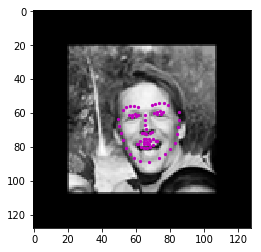

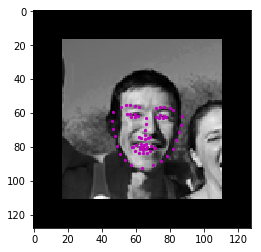

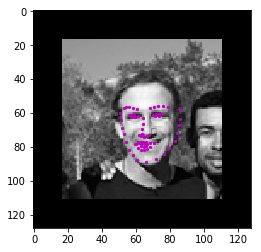

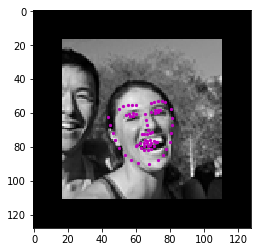

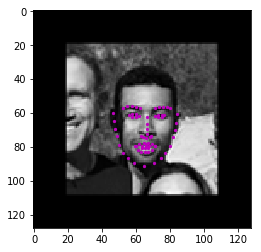

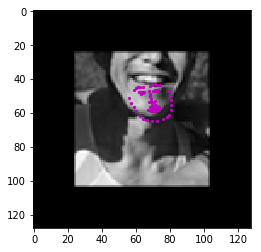

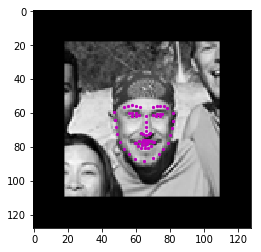

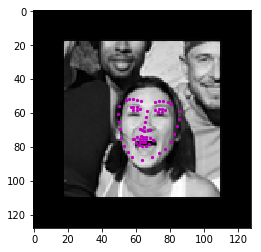

In [45]:
detect_keypoints(image)